# Import needed packages

In [2]:
import numpy as np
from scipy.sparse.linalg import expm_multiply
import matplotlib.pyplot as plt
from seaborn import set_context
set_context('talk')

from redfield_package.spectral_density import SpectralDensity
from redfield_package.linear_spectra import LinearSpectraCalculator
from redfield_package.tensors import RedfieldTensorComplex
from redfield_package.utils import overdamped_brownian,underdamped_brownian,get_timeaxis

# Define the system

**Hamiltonian (1/cm)**

In [3]:
nchrom = 2 #numero di cromofori

coupling = 100
E0 = 10000
energy_gap = 478
H = np.zeros((nchrom,nchrom)) #hamiltonian

H[0] = np.asarray([E0      ,coupling     ])
H[1] = np.asarray([coupling,E0+energy_gap])

In [4]:
H

array([[10000.,   100.],
       [  100., 10478.]])

**Transition dipoles (Debye)**

In [5]:
dipoles = np.ones([nchrom,3])

**Temperature (Kelvin)**

In [6]:
temp = 298

**Spectral density**

In [7]:
freq_axis_SD = np.arange(0.1,4000,0.1)

In [8]:
SD_1_data = overdamped_brownian(freq_axis_SD,30,37)
SD_1_data = SD_1_data + underdamped_brownian(freq_axis_SD,5,50,1000)

In [9]:
SD_2_data = overdamped_brownian(freq_axis_SD,30,37)
SD_2_data = SD_2_data + underdamped_brownian(freq_axis_SD,5,30,600)

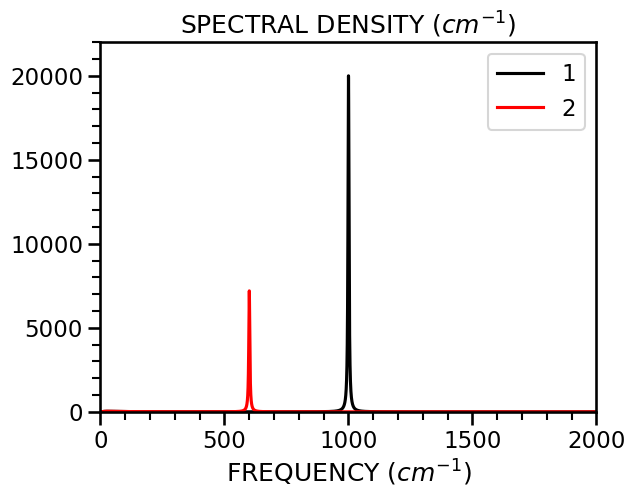

In [10]:
plt.plot(freq_axis_SD,SD_1_data,color='black',label = '1');
plt.plot(freq_axis_SD,SD_2_data,color='red',label = '2');
plt.legend();
plt.xlim(0,2000);
plt.ylim(0,22000)
plt.title('SPECTRAL DENSITY ($cm^{-1}$)');
plt.xlabel('FREQUENCY ($cm^{-1}$)');
plt.minorticks_on()

In [10]:
SD_obj = SpectralDensity(freq_axis_SD,[SD_1_data,SD_2_data],temperature=temp)

**Time axis (cm)**

In [11]:
energies = np.diag(H)
time_axis = get_timeaxis(SD_obj.Reorg,energies,5)
SD_obj.time = time_axis

**Relaxation Tensor**

In [12]:
rel_tens_obj = RedfieldTensorComplex(H,SD_obj,SD_id_list=[0,1])

# Spectrum calculation

In [13]:
spectrum_obj = LinearSpectraCalculator(rel_tens_obj,include_dephasing = True)

In [14]:
freq_axis_OD,OD = spectrum_obj.calc_OD(dipoles=dipoles)

# Check the results

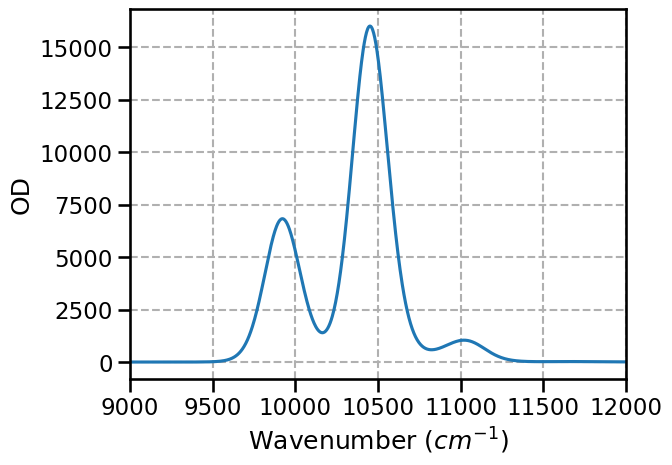

In [15]:
plt.plot(freq_axis_OD,OD)
plt.xlim(9000,12000)
plt.xlabel('Wavenumber ($cm^{-1}$)');
plt.ylabel('OD');
plt.grid(ls='--')